# In this ecommerce case study, we will use multi-variable linear regression to identify the variables that affect targeted output (Yearly amount spent).  We will use the calculated regression equation to predict various outcomes.

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
import seaborn as sns
pd.options.display.float_format = '{:.5f}'.format
import warnings
import math
import scipy.stats as stats
import scipy
from sklearn.preprocessing import scale
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_csv('/Users/lenkwok/Desktop/projects/Ecommerce Customers.csv')
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,campaigns@emails.swellsystem.com,"1844 Sir Tyler Drive, Wilmington, NC 28405",NaN,nan,nan,nan,nan,nan
1,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.49727,12.65565,39.57767,4.08262,587.95105
2,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.92627,11.10946,37.26896,2.66403,392.20493
3,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.00091,11.33028,37.11060,4.10454,487.54750
4,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.30556,13.71751,36.72128,3.12018,581.85234


In [7]:
# identify NaN or null values
null_data = df[df.isnull().any(axis=1)]
null_data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,campaigns@emails.swellsystem.com,"1844 Sir Tyler Drive, Wilmington, NC 28405",NaN,nan,nan,nan,nan,nan
27,team@covve.com,NaN,DarkOrchid,nan,nan,nan,nan,nan


In [8]:
#Drop the above two rows with any NaN values
df1=df.dropna()


In [9]:
# Correlation
df1_corr = df1.corr()

In [10]:
# Sort by column yearly amount spent
df1.corr()['Yearly Amount Spent'].sort_values()

Time on Website        -0.00238
Avg. Session Length     0.35425
Time on App             0.49918
Length of Membership    0.80865
Yearly Amount Spent     1.00000
Name: Yearly Amount Spent, dtype: float64

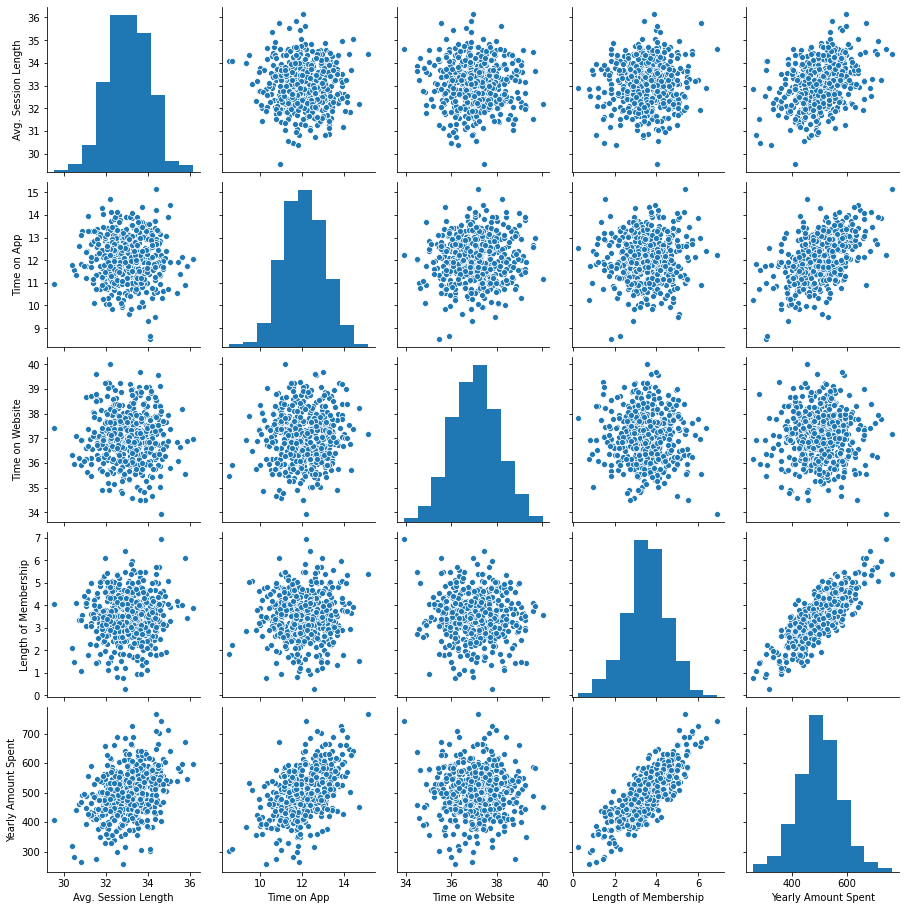

In [11]:
sns.pairplot(df1) 
#Length of Membership has really perfect linearity, 
#it is so obvious that if I can increase the customer loyalty, they will spend more! But how much?

In [12]:
y=df1["Yearly Amount Spent"]
X=df1[[ "Length of Membership", "Time on App", "Time on Website", 'Avg. Session Length']]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)


In [15]:
## Flag intermediate output

show_steps = False   # for testing/debugging
# show_steps = False  # without showing steps

In [16]:
## Use Forward Feature Selection to pick a good model

# start with no predictors
included = []
# keep track of model and parameters
best = {'feature': '', 'r2': 0, 'a_r2': 0}
# create a model object to hold the modelling parameters
model = LinearRegression()
# get the number of cases in the test data
n = X_test.shape[0]

r2_list = []
adjusted_r2_list = []

while True:
    changed = False
    
    if show_steps:
        print('') 

    # list the features to be evaluated
    excluded = list(set(X.columns) - set(included))
    
    if show_steps:
        print('(Step) Excluded = %s' % ', '.join(excluded))  

    # for each remaining feature to be evaluated
    for new_column in excluded:
        
        if show_steps:
            print('(Step) Trying %s...' % new_column)
            print('(Step) - Features = %s' % ', '.join(included + [new_column]))

        # fit the model with the Training data
        fit = model.fit(X_train[included + [new_column]], y_train)
        # calculate the score (R^2 for Regression)
        r2 = fit.score(X_train[included + [new_column]], y_train)
        
        # number of predictors in this model
        k = len(included) + 1
        # calculate the adjusted R^2
        adjusted_r2 = 1 - ( ( (1 - r2) * (n - 1) ) / (n - k - 1) )
        
        if show_steps:
            print('(Step) - Adjusted R^2: This = %.3f; Best = %.3f' % 
                  (adjusted_r2, best['a_r2']))

        # if model improves
        if adjusted_r2 > best['a_r2']:
            # record new parameters
            best = {'feature': new_column, 'r2': r2, 'a_r2': adjusted_r2}
            # flag that found a better model
            changed = True
            if show_steps:
                print('(Step) - New Best!   : Feature = %s; R^2 = %.3f; Adjusted R^2 = %.3f' % 
                      (best['feature'], best['r2'], best['a_r2']))
    # END for
    
    r2_list.append(best['r2'])
    adjusted_r2_list.append(best['a_r2'])

    # if found a better model after testing all remaining features
    if changed:
        # update control details
        included.append(best['feature'])
        excluded = list(set(excluded) - set(best['feature']))
        print('Added feature %-4s with R^2 = %.3f and adjusted R^2 = %.3f' % 
              (best['feature'], best['r2'], best['a_r2']))
    else:
        # terminate if no better model
        print('*'*50)
        break

print('')
print('Resulting features:')
print(', '.join(included))

Added feature Length of Membership with R^2 = 0.663 and adjusted R^2 = 0.660
Added feature Time on App with R^2 = 0.883 and adjusted R^2 = 0.880
Added feature Avg. Session Length with R^2 = 0.986 and adjusted R^2 = 0.985
**************************************************

Resulting features:
Length of Membership, Time on App, Avg. Session Length


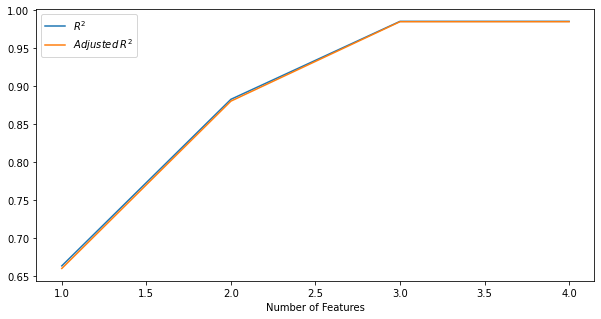

In [17]:
## Chart both R^2 and Adjusted R^2

_range = range(1, len(r2_list)+1)

# define chart size
plt.figure(figsize = (10, 5))
# plot each metric 
plt.plot(_range, r2_list, label = '$R^2$')
plt.plot(_range, adjusted_r2_list, label = '$Adjusted \: R^2$')
# add some better visualisation
plt.xlabel('Number of Features')
plt.legend()
# output the chart
plt.show()